In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
hdul = fits.open("https://dr18.sdss.org/sas/dr18/spectro/sdss/redux/v5_13_2/spectra/lite/6413/spec-6413-56336-0.fits")

In [9]:
hdul.info()

Filename: final_output.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COADD         1 BinTableHDU    113   460433R x 2C   [E, E]   


In [10]:
plate = hdul["PRIMARY"].header["PLATEID"]
mjd = hdul["PRIMARY"].header["MJD"]
fiber = hdul["PRIMARY"].header["FIBERID"]

first_wavelength = hdul["PRIMARY"].header["COEFF0"]
dispersion_per_pixel = hdul["PRIMARY"].header["COEFF1"]

KeyError: "Keyword 'PLATEID' not found."

In [11]:
# Format string meanings are defined here:
# https://docs.astropy.org/en/latest/io/fits/usage/table.html#column-creation
#
# We're mainly after the flux here.
hdul["COADD"].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'model'; format = 'E'
)

In [12]:
# Unit data is defined here:
# https://www.sdss4.org/dr17/spectro/spectro_basics/
flux = hdul["COADD"].data["flux"]

# The wavelengths we get match what we would expect from the documentation (3,650–10,400 Å)
start = 10 ** first_wavelength
end = 10 ** (first_wavelength + len(flux) * dispersion_per_pixel)

print(f"{len(flux)} samples")
print(f"λ0 = {start}")
print(f"λf = {end}")

x = np.logspace(start=first_wavelength, stop=first_wavelength + len(flux) * dispersion_per_pixel, num=len(flux))

NameError: name 'first_wavelength' is not defined

NameError: name 'x' is not defined

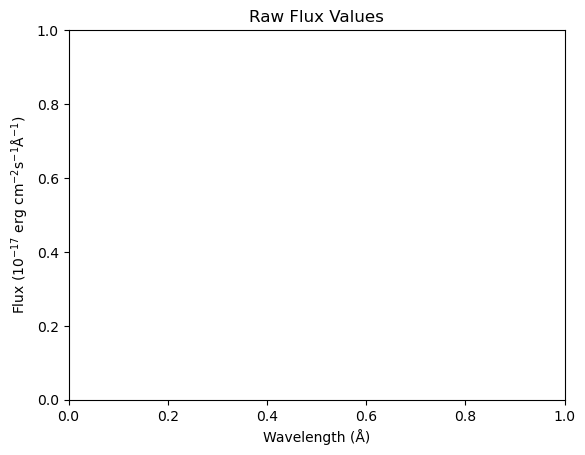

In [ ]:
plt.title("Raw Flux Values")
plt.xlabel(r"Wavelength (Å)")
plt.ylabel(r"Flux ($10^{-17}\ \text{erg}\ \text{cm}^{-2} \text{s}^{-1} \text{Å}^{-1}$)")

plt.scatter(x, flux, s=0.1)

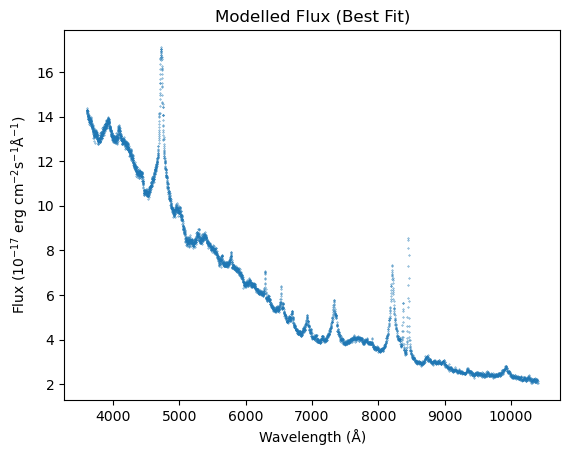

In [93]:
model = hdul["COADD"].data["model"]

plt.title("Modelled Flux (Best Fit)")
plt.xlabel(r"Wavelength (Å)")
plt.ylabel(r"Flux ($10^{-17}\ \text{erg}\ \text{cm}^{-2} \text{s}^{-1} \text{Å}^{-1}$)")

plt.scatter(x, model, s=0.1)

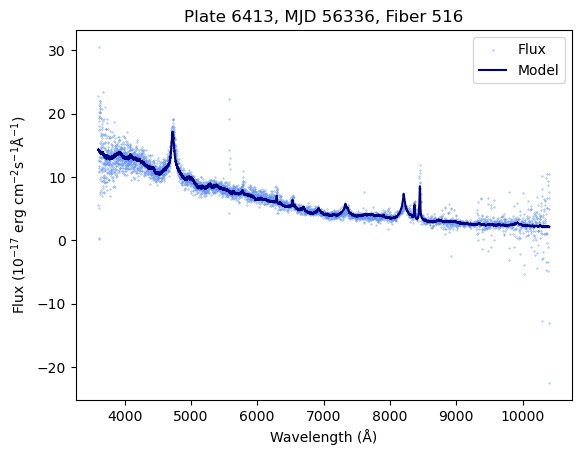

In [94]:
plt.title(f"Plate {plate}, MJD {mjd}, Fiber {fiber}")
plt.xlabel(r"Wavelength (Å)")
plt.ylabel(r"Flux ($10^{-17}\ \text{erg}\ \text{cm}^{-2} \text{s}^{-1} \text{Å}^{-1}$)")

plt.scatter(x, flux, c="cornflowerblue", s=0.1, label="Flux")
plt.plot(x, model, c="navy", label="Model")
plt.legend()

In [95]:
hdul["SPALL"].columns

ColDefs(
    name = 'PROGRAMNAME'; format = '27A'
    name = 'CHUNK'; format = '14A'
    name = 'PLATEQUALITY'; format = '4A'
    name = 'PLATESN2'; format = 'E'
    name = 'DEREDSN2'; format = 'E'
    name = 'PRIMTARGET'; format = 'J'
    name = 'SECTARGET'; format = 'J'
    name = 'LAMBDA_EFF'; format = 'E'
    name = 'BLUEFIBER'; format = 'J'
    name = 'ZOFFSET'; format = 'E'
    name = 'XFOCAL'; format = 'E'
    name = 'YFOCAL'; format = 'E'
    name = 'BOSS_TARGET1'; format = 'K'
    name = 'BOSS_TARGET2'; format = 'K'
    name = 'ANCILLARY_TARGET1'; format = 'K'
    name = 'ANCILLARY_TARGET2'; format = 'K'
    name = 'EBOSS_TARGET0'; format = 'K'
    name = 'EBOSS_TARGET1'; format = 'K'
    name = 'EBOSS_TARGET2'; format = 'K'
    name = 'EBOSS_TARGET_ID'; format = 'K'
    name = 'THING_ID_TARGETING'; format = 'K'
    name = 'SPECPRIMARY'; format = 'B'
    name = 'SPECBOSS'; format = 'B'
    name = 'BOSS_SPECOBJ_ID'; format = 'J'
    name = 'NSPECOBS'; format = 'I'
    name = 'C

In [96]:
hdul["SPZLINE"].columns

ColDefs(
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'LINENAME'; format = '13A'
    name = 'LINEWAVE'; format = 'D'
    name = 'LINEZ'; format = 'E'
    name = 'LINEZ_ERR'; format = 'E'
    name = 'LINESIGMA'; format = 'E'
    name = 'LINESIGMA_ERR'; format = 'E'
    name = 'LINEAREA'; format = 'E'
    name = 'LINEAREA_ERR'; format = 'E'
    name = 'LINEEW'; format = 'E'
    name = 'LINEEW_ERR'; format = 'E'
    name = 'LINECONTLEVEL'; format = 'E'
    name = 'LINECONTLEVEL_ERR'; format = 'E'
    name = 'LINENPIXLEFT'; format = 'J'
    name = 'LINENPIXRIGHT'; format = 'J'
    name = 'LINEDOF'; format = 'E'
    name = 'LINECHI2'; format = 'E'
)

In [97]:
hdul["SPZLINE"].data

FITS_rec([(6413, 56336, 516, 'Ly_alpha', 1215.67      , 0.        , -1.0000000e+00,    0.    ,  -1.      ,   0.       , -1.       ,  0.       , -1.        ,  0.       , -1.        ,   0,   0,   0.      ,  -1.      ),
          (6413, 56336, 516, 'N_V 1240', 1240.81      , 0.        , -1.0000000e+00,    0.    ,  -1.      ,   0.       , -1.       ,  0.       , -1.        ,  0.       , -1.        ,   0,   0,   0.      ,  -1.      ),
          (6413, 56336, 516, 'C_IV 1549', 1549.48      , 0.        , -1.0000000e+00,    0.    ,  -1.      ,   0.       , -1.       ,  0.       , -1.        ,  0.       , -1.        ,   0,   0,   0.      ,  -1.      ),
          (6413, 56336, 516, 'He_II 1640', 1640.42      , 0.        , -1.0000000e+00,    0.    ,  -1.      ,   0.       , -1.       ,  0.       , -1.        ,  0.       , -1.        ,   0,   0,   0.      ,  -1.      ),
          (6413, 56336, 516, 'C_III] 1908', 1908.734     , 0.        , -1.0000000e+00,    0.    ,  -1.      ,   0.       , -1.   